# **IMPORTS**

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""
!kaggle datasets download -d overload10/adult-census-dataset

adult-census-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/adult-census-dataset.zip

Archive:  /content/adult-census-dataset.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: adult.csv               


In [ ]:
!pip install sweetviz

In [ ]:
!pip install klib

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/adult.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df = df.replace(' ?',np.nan)
df.shape

(32561, 15)

In [ ]:
df.dropna(how='any',inplace=True)
df.shape

(30162, 15)

# **KLIB**

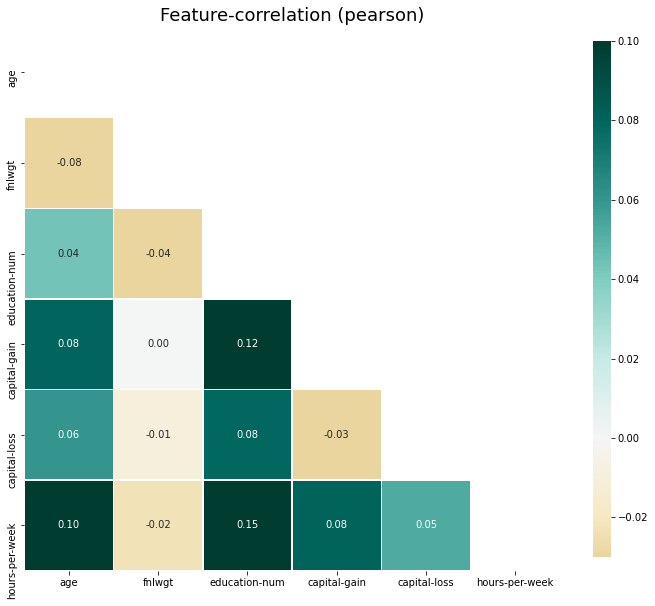

In [ ]:
import klib
klib.corr_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


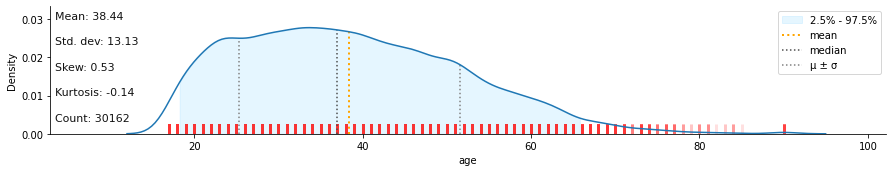

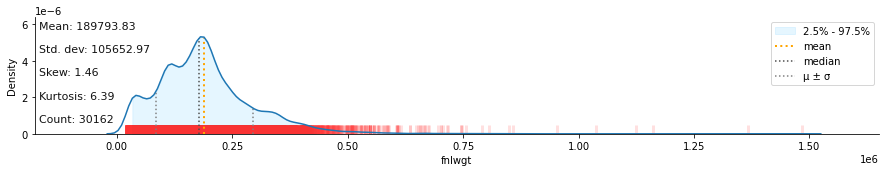

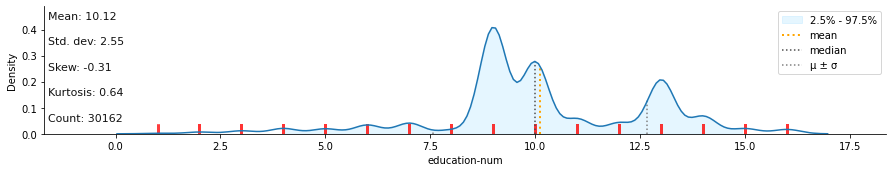

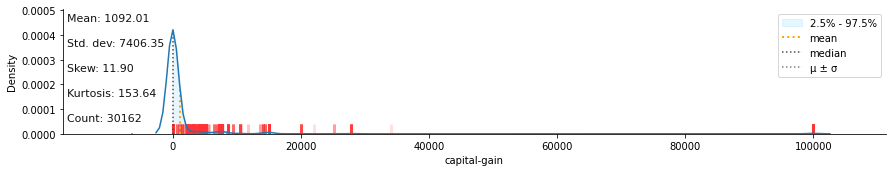

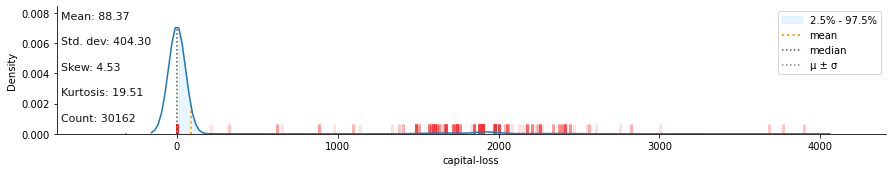

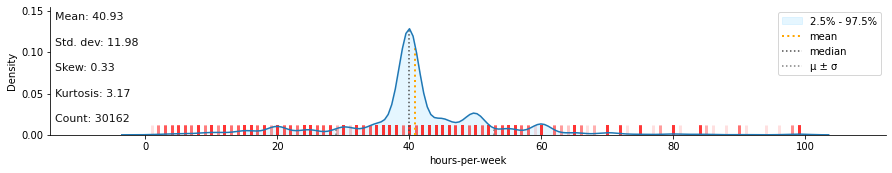

In [ ]:
klib.dist_plot(df)

GridSpec(6, 9)

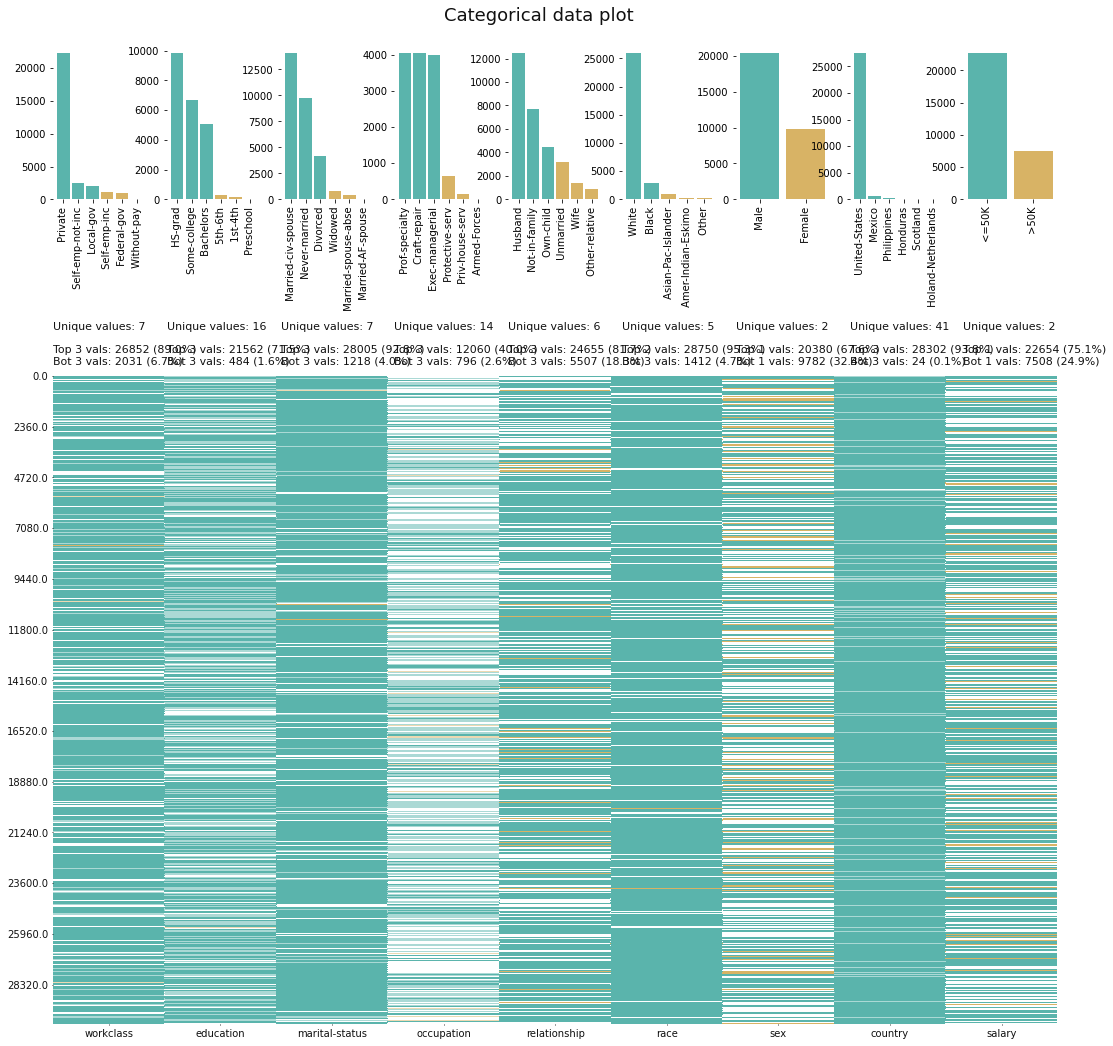

In [ ]:
klib.cat_plot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  country         30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
clean_df = klib.data_cleaning(df)

Shape of cleaned data: (30139, 15)Remaining NAs: 0

Changes:
Dropped rows: 23
     of which 23 duplicates. (Rows: [4881, 5104, 9171, 11631, 13084, 15059, 17040, 18698, 21318, 21490, 21875, 22300, 22367, 22494, 25872, 26313, 28230, 28522, 28846, 29157, 30845, 31993, 32404])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 4.29 MB (-87.02%)



In [ ]:
clean_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30139 non-null  int8    
 1   workclass       30139 non-null  category
 2   fnlwgt          30139 non-null  int32   
 3   education       30139 non-null  category
 4   education_num   30139 non-null  int8    
 5   marital_status  30139 non-null  category
 6   occupation      30139 non-null  category
 7   relationship    30139 non-null  category
 8   race            30139 non-null  category
 9   sex             30139 non-null  category
 10  capital_gain    30139 non-null  int32   
 11  capital_loss    30139 non-null  int16   
 12  hours_per_week  30139 non-null  int8    
 13  country         30139 non-null  category
 14  salary          30139 non-null  category
dtypes: category(9), int16(1), int32(2), int8(3)
memory usage: 652.0 KB


In [ ]:
clean_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
clean_df['salary'] = clean_df['salary'].replace(" >50K", 1)
clean_df['salary'] = clean_df['salary'].replace(" <=50K", 0)

In [ ]:
clean_df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
30138,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [ ]:
clean_df['salary'] = list(map(int, clean_df['salary']))

In [ ]:
ed_col = clean_df.pop('education')

In [ ]:
clean_df = pd.get_dummies(clean_df)

In [ ]:
clean_df.shape

(30139, 89)

In [ ]:
X_train, X_test, Y_train, Y_test = klib.train_dev_test_split(clean_df,'salary', dev_size=0)

# ***SVM***

In [ ]:
from sklearn import svm

In [ ]:
cls = svm.SVC()
cls.fit(X_train, Y_train)

SVC()

In [ ]:
cls.score(X_test, Y_test)

0.7883211678832117

# **NN**

In [ ]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(88, input_dim=88, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=12)

Epoch 1/12
848/848 [==============================] - 3s 3ms/step - loss: 354.8672 - accuracy: 0.6730
Epoch 2/12
848/848 [==============================] - 2s 3ms/step - loss: 145.7228 - accuracy: 0.6717
Epoch 3/12
848/848 [==============================] - 2s 3ms/step - loss: 59.4890 - accuracy: 0.6781
Epoch 4/12
848/848 [==============================] - 2s 3ms/step - loss: 36.5213 - accuracy: 0.6769
Epoch 5/12
848/848 [==============================] - 2s 3ms/step - loss: 21.7071 - accuracy: 0.6783
Epoch 6/12
848/848 [==============================] - 2s 3ms/step - loss: 12.2849 - accuracy: 0.6829
Epoch 7/12
848/848 [==============================] - 2s 3ms/step - loss: 6.7695 - accuracy: 0.6794
Epoch 8/12
848/848 [==============================] - 2s 3ms/step - loss: 3.6254 - accuracy: 0.6855
Epoch 9/12
848/848 [==============================] - 2s 3ms/step - loss: 1.3362 - accuracy: 0.7050
Epoch 10/12
848/848 [==============================] - 2s 3ms/step - loss: 0.7935 - accuracy

In [ ]:
model.evaluate(X_test, Y_test)

95/95 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.8009


[0.5079230070114136, 0.8009290099143982]

# **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=200)
randomForest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
randomForest.score(X_test, Y_test)

0.845056403450564